# TELCO CUSTOMER CHURN PREDICTION

## Business Problem Understanding

### Context

Sebuah perusahaan telekomunikasi kerap kali menghadapi risiko tinggi yang dapat mempengaruhi performa perusahaan, yaitu churn. Churn pada perusahaan telekomunikasi atau layanan berbasis langganan mengindikasikan situasi ketika pelanggan memutuskan untuk meninggalkan penyedia layanan.  Oleh karena itu, Untuk mengurangi kehilangan pelanggan, perusahaan perlu memantau pelanggan yang berhenti dan faktor-faktor yang meningkatkan risiko churn.

### Stakeholders



*   **Management**: sebagai decision maker dalam menerapkan program retensi dan pertumbuhan bisnis jangka panjang
*   **Marketing Team**: untuk merancang kampanye retensi, promosi, dan penawaran khusus agar pelanggan tetap berlangganan.
*   **Product Management Team**: untuk memperbaiki produk, paket layanan, dan pengalaman pelanggan.




### Problem Statement

Perusahaan telekomunikasi merupakan perusahaan yang bergantung pada pelanggan berulang. Oleh karena itu, pelanggan yang churn memiliki risiko tinggi dalam merugikan bisnis. Hal tersebut disebabkan karena perusahaan akan mengalami kerugian dan penurunan pendapatan berulang bulanan (MRR), yang dapat mengancam keberlanjutan bisnis. Selain itu, perusahaan perlu perusahaan perlu mengeluarkan biaya yang lebih tinggi, biasanya mencakup biaya teknisi dan perangkat untuk pelanggan baru. Oleh karena itu, model prediksi churn yang andal diperlukan untuk membantu perusahaan menjaga stabilitas dan mengurangi kerugian bisnis.

### Goals


*   Membangun model klasfikasi yang akurat untuk dapat memprediksi potensi pelanggan churn dengan baik. Sehingga, perusahaan dapat menargetkan program retensi yang dapat mengurangi churn
*   Mengidentifikasi faktor yang dapat mempengaruhi churn




### Analytical Approach

Pendekatan yang dilakukan adalah menganalisis perilaku pelanggan terhadap churn untuk mengidentifikasi pola dan faktor yang memengaruhinya. Selanjutnya, dibangun model machine learning klasifikasi yang dapat memprediksi kemungkinan pelanggan akan churn atau tetap berlangganan, sehingga membantu perusahaan dalam mengambil keputusan retensi yang lebih tepat.

### Metric Evaluation

Berdasarkan permasalahan yang telah dipaparkan, konsekuensi dari False Negative lebih merugikan dibandingkan False Positive, karena perusahaan berpotensi kehilangan pelanggan dan pendapatan. Sementara itu, konsekuensi False Positive (biaya marketing kurang tepat sasaran) masih dapat memberikan efek positif berupa peningkatan engagement pelanggan. Oleh karena itu, fokus evaluasi model diarahkan pada metrik yang menekankan kemampuan mendeteksi pelanggan berisiko churn, yaitu:

*   **F2-Score**: Mempertimbangkan recall dan precision, namun memberikan bobot lebih besar pada recall. Dengan demikian, F2-Score membantu meminimalkan False Negative agar lebih banyak pelanggan yang berisiko churn dapat terdeteksi dengan benar.
*   **Recall**: Mengukur seberapa banyak pelanggan churn yang berhasil terdeteksi dengan benar oleh model.
*   **AUC Score**: Menggambarkan kemampuan model dalam membedakan antara pelanggan churn dan non-churn secara keseluruhan


## Import Library

In [1]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.9 MB/s eta 0:00:00


In [2]:
# Manipulation & Analysis
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from sklearn.model_selection import learning_curve

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette("tab10")  # contoh: Set2
sns.set_palette(color)
sns.set_theme(style="whitegrid")


# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import LearningCurveDisplay
from sklearn.model_selection import learning_curve

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')

# Set max columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## Import Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Purwadhika DS Fix/Capstone & Project/Capstone 3/data_telco_customer_churn.csv'
df = pd.read_csv(path)
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [5]:
# duplicate the raw data before cleaning
df_copy = df.copy()

## Data Understanding

In [6]:
# Data Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [7]:
# detailed summary of the columns
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[Yes, No]"
1,tenure,int64,0,0.0,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,object,0,0.0,3,"[No, Yes, No internet service]"
3,OnlineBackup,object,0,0.0,3,"[No, Yes, No internet service]"
4,InternetService,object,0,0.0,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,object,0,0.0,3,"[Yes, No internet service, No]"
6,TechSupport,object,0,0.0,3,"[Yes, No, No internet service]"
7,Contract,object,0,0.0,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,object,0,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0,0.0,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


In [8]:
# Handling Inconsistent Data

col_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

for col in col_replace:
    df[col] = df[col].replace({'No internet service' : 'No'})

Mengganti nilai "No internet service" pada kolom OnlineSecurity, OnlineBackup,DeviceProtection, dan TechSupport karena value tersebut memiliki makna yang sama dengan "No"

### Statistical Descriptive

In [9]:
# summary of the statictical description for numerical and categorical columns
numeric_desc = df.describe()
categoric_desc = df.describe(include='object')

display(numeric_desc, categoric_desc)

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,2,2,3,2,2,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,3497,3224,2172,3238,3519,2721,2957,3614


### Distribution Test

#### Numerical Columns

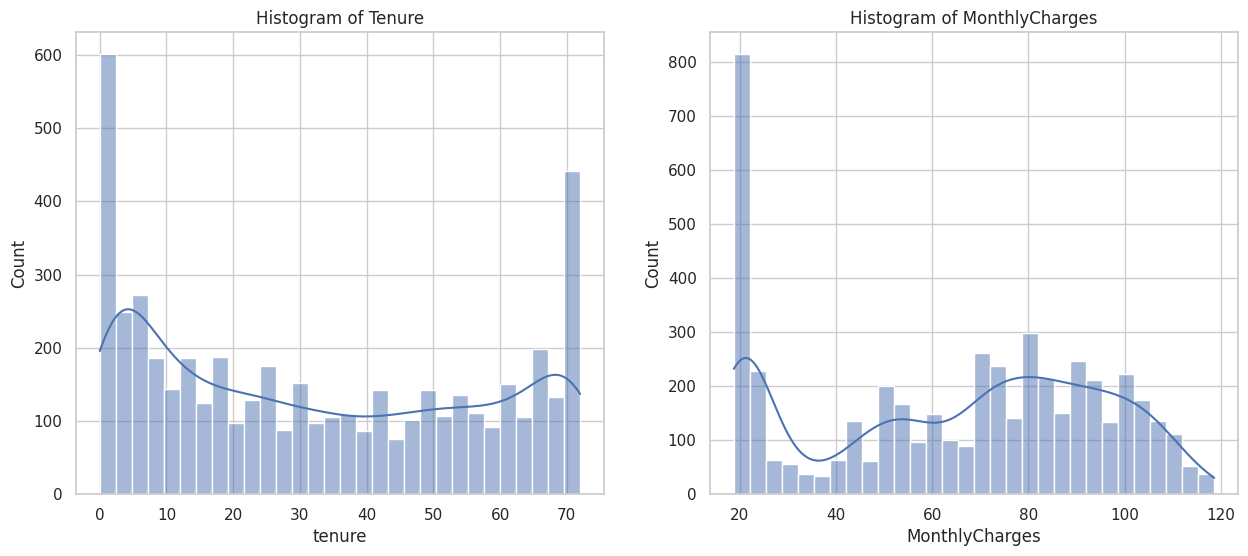

In [10]:
 plt.figure(figsize=(15, 6))

# Tenure Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Histogram of Tenure')

# MonthlyCharges Histogram
plt.subplot(1, 2, 2)
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title('Histogram of MonthlyCharges')

plt.show()

In [11]:
# Normal Distribution test
numeric_cols = ['tenure','MonthlyCharges']

for col in numeric_cols:
    stat, pvalue =shapiro(df[col])
    alpha = 0.05

    if pvalue > alpha:
        print(f'pvalue: {pvalue}. pvalue > {alpha}, Fail to reject H0, we can assume that the {col} is normally distributed.')
    else:
        print(f'pvalue: {pvalue}. pvalue < {alpha}, Reject H0, we can assume that the {col} is not normally distributed.')

pvalue: 3.8354932230776754e-48. pvalue < 0.05, Reject H0, we can assume that the tenure is not normally distributed.
pvalue: 1.1489329163475074e-44. pvalue < 0.05, Reject H0, we can assume that the MonthlyCharges is not normally distributed.


Berdasarkan hypothesis testing dengan metode shapiro wilk, kolom tenure dan monthlycharges tidak berdistribusi normal

#### Categorical Columns

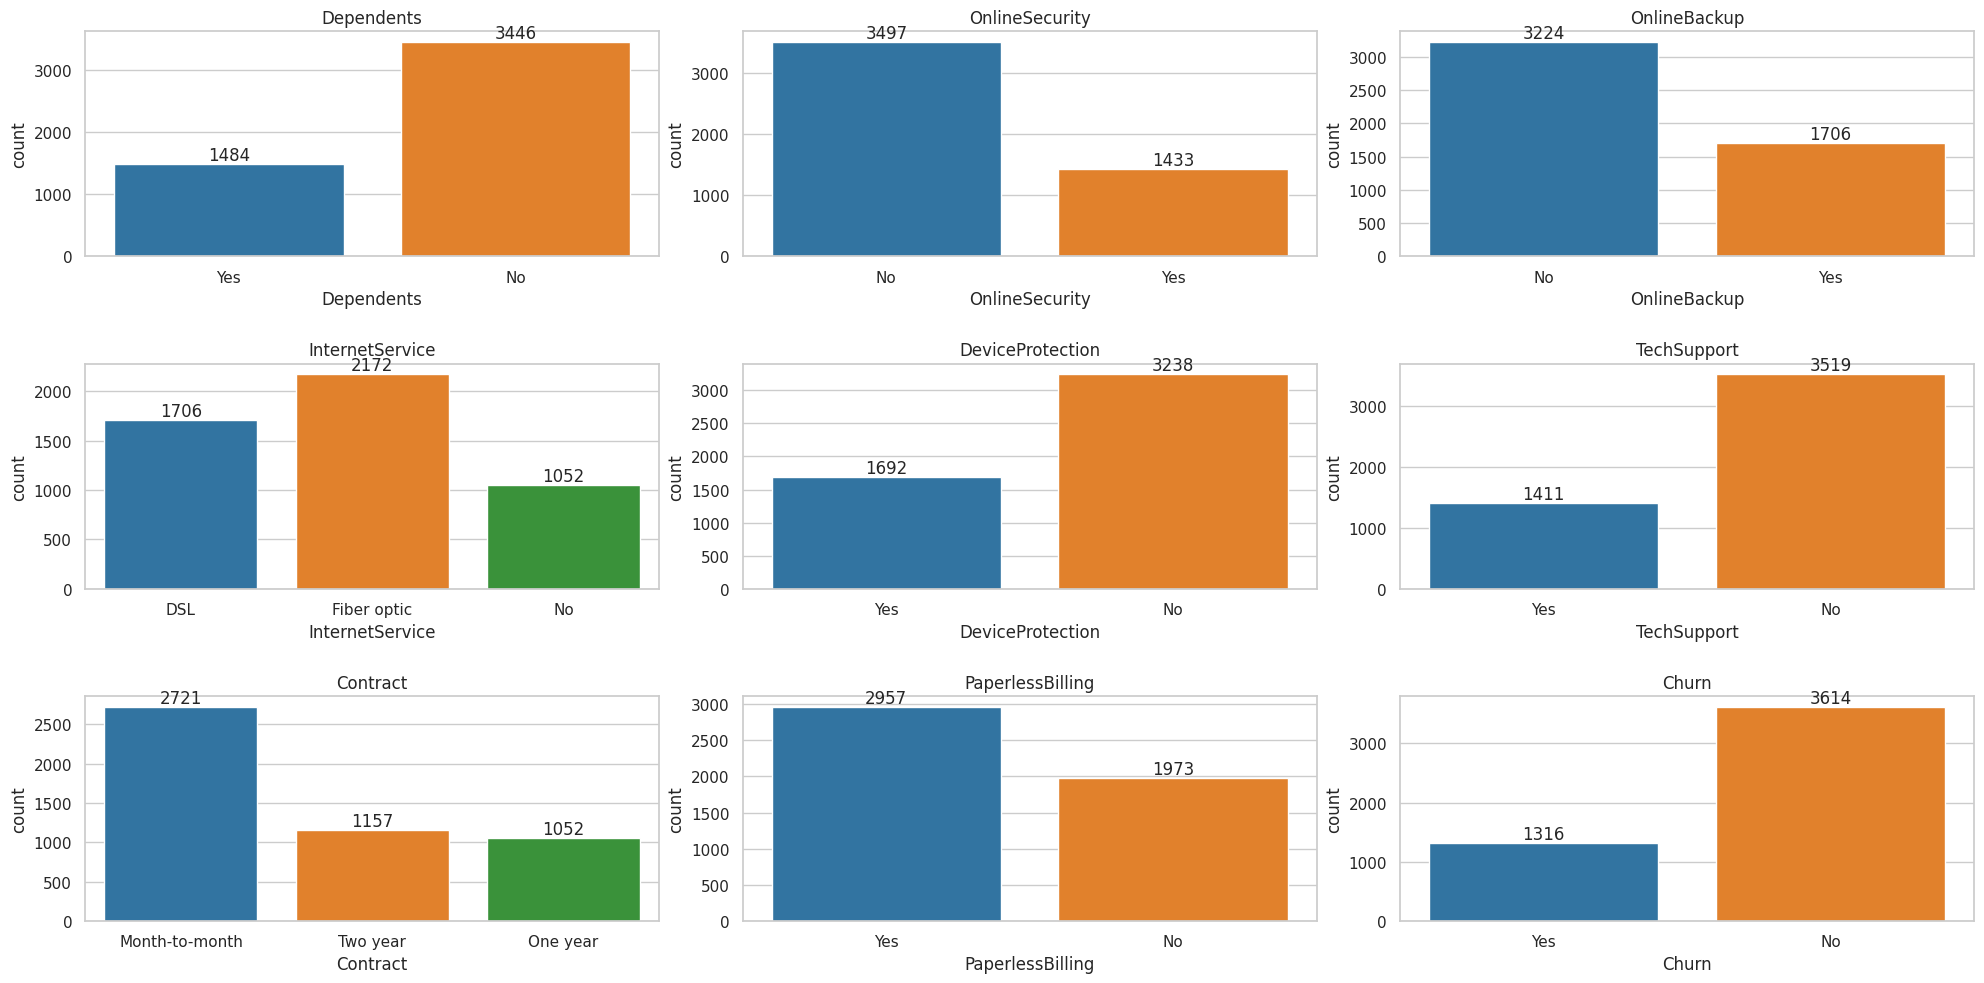

In [12]:
cols = df.select_dtypes(include='object').columns
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 10))
axs = axs.flatten()

for i, col in enumerate(cols):
    bars = sns.countplot(data=df, x=col, palette=color, ax=axs[i])
    axs[i].set_title(col)
    for idx, bar in enumerate(bars.patches):
        x_value = bar.get_x() + bar.get_width() / 2
        y_value = bar.get_height()
        label = "{:.0f}".format(bar.get_height())
        axs[i].text(x_value, y_value, label, ha='center', va='bottom')

plt.tight_layout(w_pad=0.5, h_pad=2)
plt.show()

### Outlier

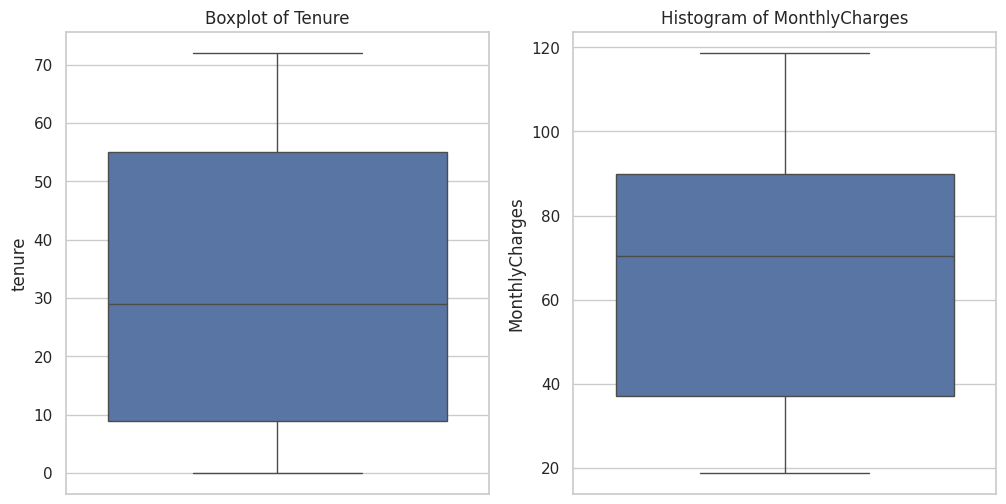

In [13]:
plt.figure(figsize=(12, 6))

# Tenure Histogram
plt.subplot(1, 2, 1)
sns.boxplot(y=df['tenure'])
plt.title('Boxplot of Tenure')

# MonthlyCharges Histogram
plt.subplot(1, 2, 2)
sns.boxplot(y = df['MonthlyCharges'])
plt.title('Histogram of MonthlyCharges')

plt.show()

In [14]:
def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

numerical = [var for var in df.columns if df[var].dtypes != 'object']

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(df, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(df[column]) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,tenure,0,0.0,-60.00,124.00
1,MonthlyCharges,0,0.0,-42.15,169.05


Berdasarkan boxplot kolom numerik di atas, dapat diketahui bahwa kolom-kolom tersebut tidak memiliki nilai ekstrim (outlier)

### Correlation

#### Numerical Columns

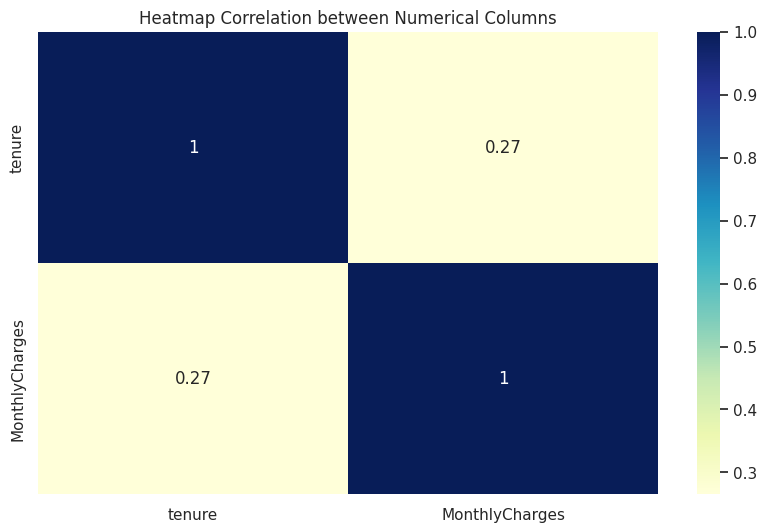

In [15]:
plt.figure(figsize=(10, 6))
corr = df[['tenure', 'MonthlyCharges']].corr(method='spearman') #using spearman method because the columns are not normally distributed

sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title('Heatmap Correlation between Numerical Columns')
plt.show()

Lamanya pelanggan berlangganan (tenure)berkorelasi positif lemah dengan tagihan bulanannya (MonthlyCharged), dimana semakin lama pelanggan berlangganan tagihan bulanannya cenderung sedikit meningkat.

#### Categorical Columns

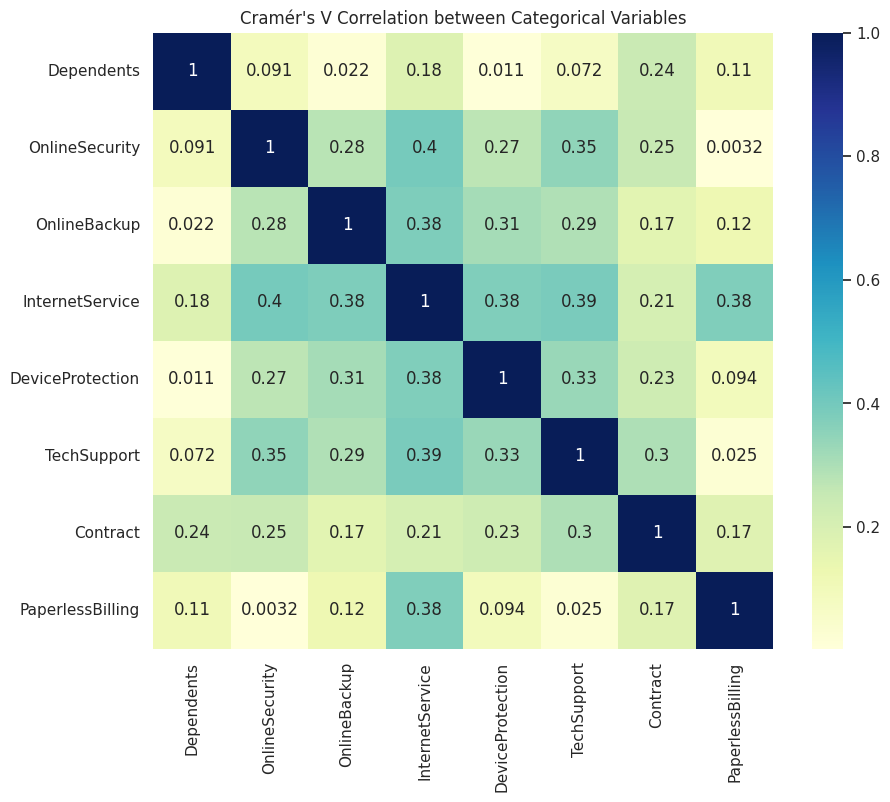

In [16]:
# Calculate & visualize the crame's V correlation between categorical columns


categoric_col = ['Dependents',  'OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling']

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Create  Cramér’s V metrics
cramers_matrix = pd.DataFrame(np.zeros((len(categoric_col), len(categoric_col))),
                              index=categoric_col, columns=categoric_col)

for col1 in categoric_col:
    for col2 in categoric_col:
        cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Visualize the Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cramers_matrix, annot=True, cmap="YlGnBu")
plt.title("Cramér's V Correlation between Categorical Variables")
plt.show()

### Churn Distribution by Categorical Variable

In [17]:
df.columns

Index(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges', 'Churn'],
      dtype='object')

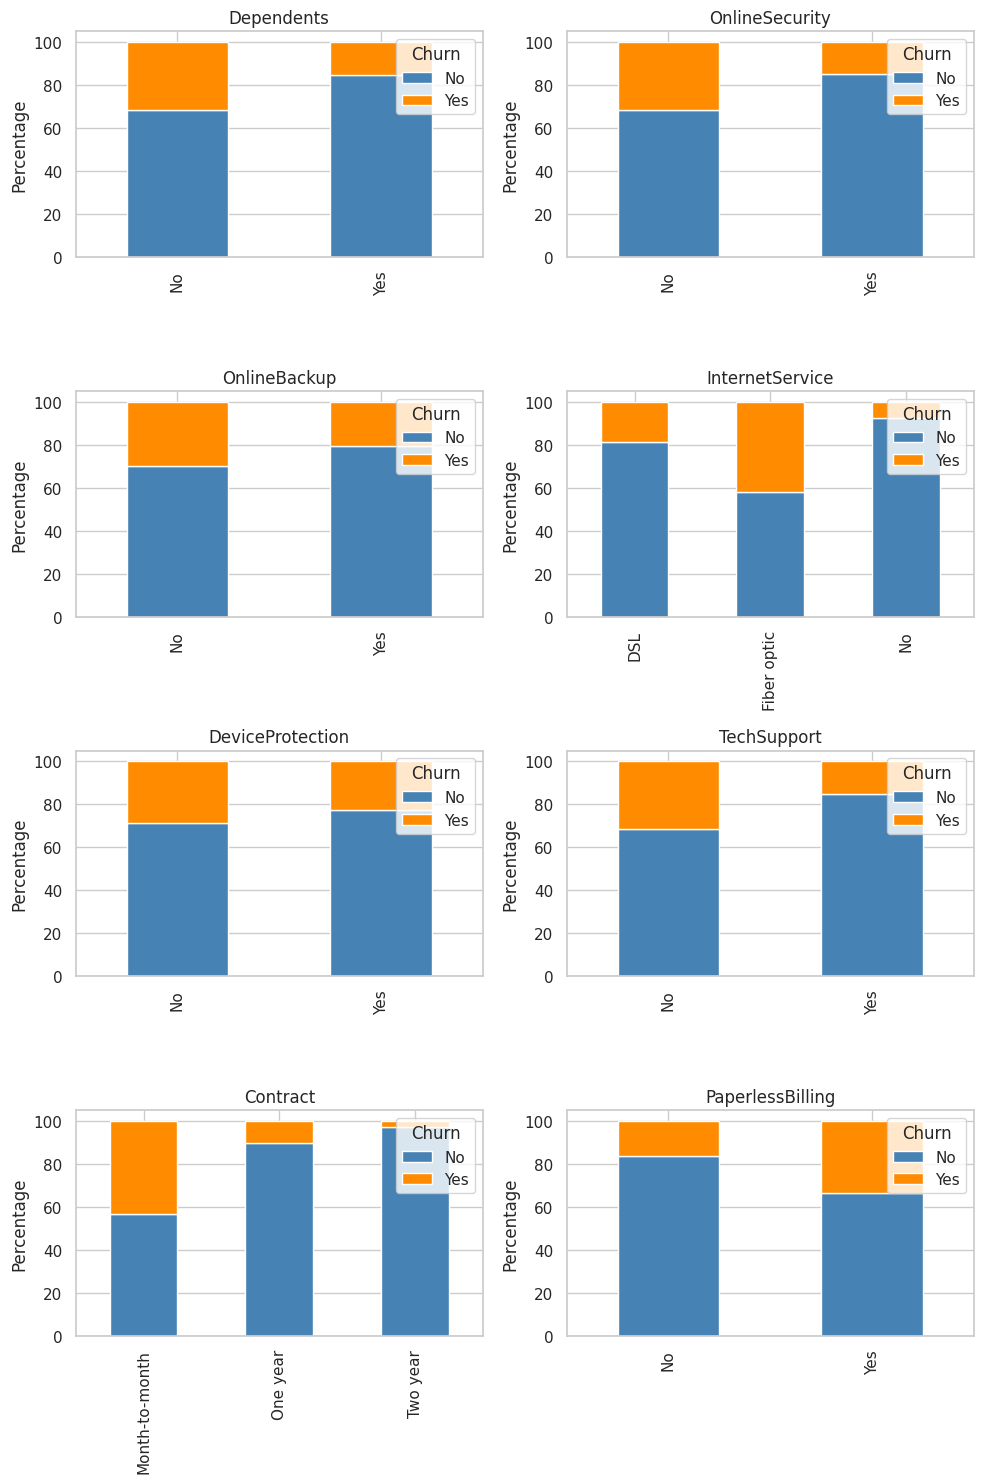

In [18]:

fig, axes = plt.subplots(4,2, figsize=(10, 15))  # 3 baris × 3 kolom
axes = axes.flatten()

for i, col in enumerate(categoric_col):
    # proportion table
    crosstab = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], color=['steelblue', 'darkorange'])

    axes[i].set_title(col)
    axes[i].set_ylabel('Percentage')
    axes[i].set_xlabel('')
    axes[i].legend(title='Churn', loc='upper right')

for j in range(len(categoric_col), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Visualisasi distribusi churn berdasarkan fitur kategorik diatas menunjukkan beberapa insights, yaitu:

*   Pelanggan yang tidak memiliki tanggungan, online security, online backup, device protection, tech support, dan tidak belangganan internet cenderung memiliki risiko churn lebih tinggi
*   Pelanggan yang memiliki berlangganan internet dengan fiber optic cmemiliki risiko churn lebih tinggi
*   Pelanggan yang memiliki kontrak dengan durasi yang singkat (Month-to-Month) lebih berpotensi churn dibandingkan pelanggan yang memiliki kontrak tahunan
*   Pelanggan yang menggunakan paperless billing cenderung lebih churn







### Churn Distribution by Numerical Variable

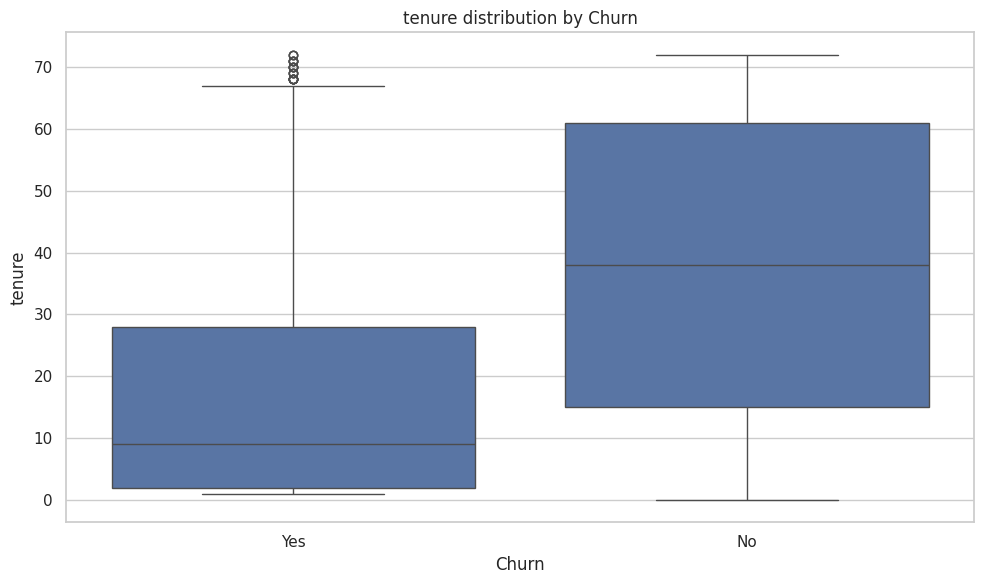

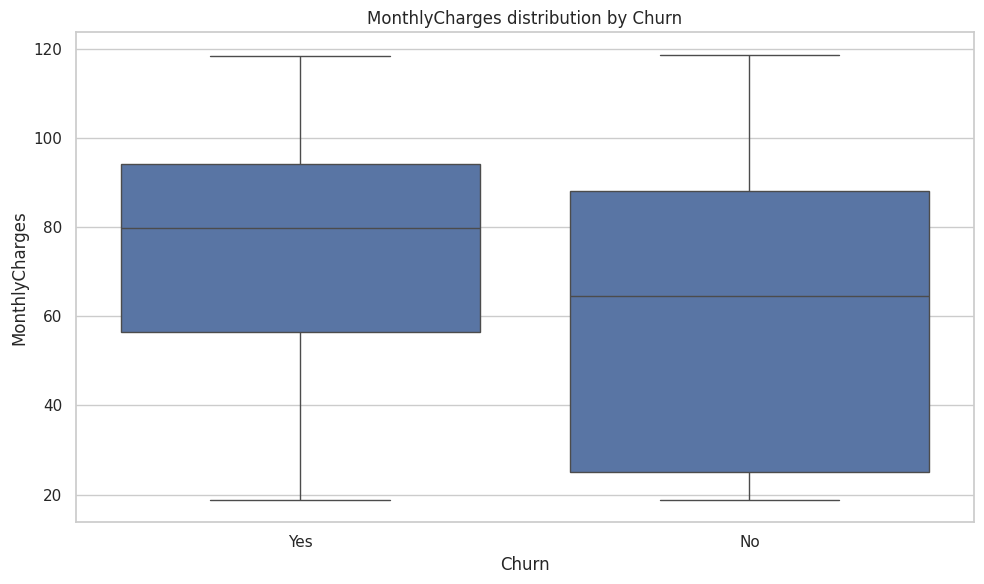

In [19]:
for col in numeric_cols:
  plt.figure(figsize=(10,6))
  sns.boxplot(x='Churn', y=col, data=df)
  plt.title(f'{col} distribution by Churn')
  plt.tight_layout()
  plt.show()

Jika berdasarkan analisis distribusi churn pada fitur numerik, dapat disimpulkan bahwa :

*   Semakin lama pelanggan berlangganan (Tenure tinggi), semakin besar kemungkinan pelanggan tidak churn, menandakan loyalitas pelanggan meningkat seiring waktu.
*   Sebaliknya, pelanggan dengan tagihan bulanan (MonthlyCharges) rendah cenderung lebih berisiko tidak churn, sementara pelanggan dengan tagihan lebih tinggi memiliki risiko churn yang lebih tinggi.


## Data Preprocessing

### Duplicate

In [20]:
df.duplicated().sum()

np.int64(77)

In [21]:
# drop duplicated data
df = df.drop_duplicates(keep='first')

terdapat 77 data yang duplikat, sehingga data tersebut perlu dihapus

### Data Splitting

In [22]:
# convert target column value to numeric format
df['Churn'] = np.where(df['Churn']=='Yes', 1, 0)

In [23]:
# define feature and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42
)

print(f'X_size: {X.shape}, y_size: {y.shape}')

X_size: (4853, 10), y_size: (4853,)


In [24]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

3882 3882
971 971


### Pipeline

#### Scaling & Encoding

| Technique | Reason to Use |
|------------|---------------|
| **MinMax Scaler** | The data has no significant outliers, but not normally distributed, also it scales all features to the same range |
| **One-Hot Encoding** | Suitable for non-ordinal categorical variables; it allows models to interpret categories without assuming any order. |
| **SMOTE** | Generates synthetic samples for the minority class instead of duplicating existing ones, improving model performance on mild imbalanced datasets. |


In [25]:
# Create a preprocessing pipeline: scale numeric features and one-hot encode categorical features
preprocessor = ColumnTransformer([
        ("num", MinMaxScaler(), numeric_cols),
        ("cat", OneHotEncoder(drop='first', handle_unknown="ignore"), categoric_col)
    ])

#### Imbalance Data

In [26]:
pd.Series(y).value_counts(normalize=True)

,proportion
Churn,
0,0.734597
1,0.265403


nilai target menunjukkan ketidakseimbangan, dimana nilai 0 (tidak churn) mendominasi data sebesar 73%, sedangkan 1 (churn) hanya sebesar 26.5%. Maka dari itu, nilai tersebut perlu diseimbangkan

In [27]:
# SMOTE
smote = SMOTE(random_state=42)

### Multicolinearity

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_train_copy = X_train.copy()

# Define the predictor variables
x_train_encoded = preprocessor.fit_transform(x_train_copy)

encoded_feature_names = (
    list(preprocessor.named_transformers_["num"].get_feature_names_out(numeric_cols)) +
    list(preprocessor.named_transformers_["cat"].get_feature_names_out(categoric_col))
)


encoded_feature = pd.DataFrame(x_train_encoded, columns=encoded_feature_names)


# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = encoded_feature.columns
vif_data['VIF'] = [variance_inflation_factor(encoded_feature.values, i) for i in range(encoded_feature.shape[1])]
vif_data.sort_values(by='VIF',ascending=False)

,Feature,VIF
1,MonthlyCharges,21.692613
5,InternetService_Fiber optic,8.477649
0,tenure,6.437711
10,Contract_Two year,3.244226
11,PaperlessBilling_Yes,2.734973
7,DeviceProtection_Yes,2.421554
4,OnlineBackup_Yes,2.265604
8,TechSupport_Yes,2.228177
9,Contract_One year,2.047180
3,OnlineSecurity_Yes,2.042786


Semakin tinggi nilai VIF, semakin besar kemungkinan terjadinya multikolinearitas, sehingga diperlukan analisis lebih lanjut. Jika nilai VIF lebih dari 10, berarti terdapat multikolinearitas yang signifikan.

Berdasarkan nilai VIF dari fitur yang akan dipakai di model, nilai tertinggi adalah 21. Namun, kolom MonthlyCharges tersebut tidak dihapus pada kasus ini karena dapat berpotensi menurunkan performa, mengingat jumlah kolomnya sudah sedikit. Selain itu, multikolinearitas tidak menjadi masalah pada model non linear yang mana akan dipakai di kasus ini.

## Modelling & Evaluation

| **Model** | **Reason to Use** |
|------------|------------------|
| **Logistic Regression** | Simple and effective for small datasets; provides interpretable coefficients. |
| **K-Nearest Neighbors (KNN)** | Simple, non-parametric, and flexible; can capture any type of relationship. |
| **Decision Tree** | Fast and highly interpretable; can model both linear and non-linear relationships. |
| **Random Forest** | An ensemble (bagging) method that improves accuracy, reduces overfitting, and is robust to noise. |
| **XGBoost** | A boosting method that reduces bias, provides high accuracy, and includes regularization to prevent overfitting. |
| **AdaBoost** | Reduce bias; often results in high accuracy by combining weak learners. |
| **Gradient Boosting (GB)** | Reduce bias, flexible and effective for both regression and classification tasks. |


In [30]:
lg = LogisticRegression(random_state = 42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state = 42)
rf = RandomForestClassifier(random_state = 42)
xgb = XGBClassifier(random_state = 42)
adb = AdaBoostClassifier(random_state = 42)
gb = GradientBoostingClassifier(random_state = 42)

### Model Benchmarking

#### Train Data

Penggunaan nilai beta = 1.5 bertujuan agar metrik lebih menekankan pada recall dibandingkan precision, namun tetap menjaga keseimbangan keduanya agar tidak terlalu bias terhadap recall.

In [31]:
from sklearn.metrics import make_scorer, fbeta_score
f2_scorer = make_scorer(fbeta_score, beta=1.5)

models = [lg, knn, dt, rf, xgb, adb, gb]
score = []
mean = []
std = []

for i in models:
    skfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    estimator=Pipeline([
        ('preprocessing',preprocessor),
        ('balancing', smote),
        ('model',i)])

    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring=f2_scorer)
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())

# f2 scores for each algorithm
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost', 'GradientBoost'],'mean_f2':mean,'sdev':std}).set_index('model').sort_values(by='mean_f2',ascending=False)


,mean_f2,sdev
model,,
AdaBoost,0.683304,0.012444
Logistic Regression,0.681115,0.010584
GradientBoost,0.667678,0.023199
XGBoost,0.601546,0.029193
KNN,0.582928,0.014659
Random Forest,0.564245,0.015565
Decision Tree,0.534043,0.014000


Berdasarkan hasil f2 score pada 7 model di atas, nilai yang paling tinggi terdapat pada model Adaboost

#### Test Data

In [32]:
from sklearn.metrics import fbeta_score

f2_score_test = []

for model in models:
    estimator = Pipeline([
        ('preprocessing', preprocessor),
        ('balancing', smote),
        ('model', model)
    ])

    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)

    score = fbeta_score(y_test, y_pred, beta=1.5)  # <- ini F2 score
    f2_score_test.append(score)

pd.DataFrame({
  'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost', 'GradientBoost'],
  'F2_score_test': f2_score_test
}).sort_values(by='F2_score_test', ascending=False)


,model,F2_score_test
5,AdaBoost,0.698210
6,GradientBoost,0.689239
0,Logistic Regression,0.680889
4,XGBoost,0.613828
1,KNN,0.591848
3,Random Forest,0.552786
2,Decision Tree,0.503704


Berdasarkan nilai pada data tes nya, f2 score tertinggi terdapat pada model Adaboost

### Hyperparameter Tuning

Berdasarkan hasil f2 score sebelumnya, dapat dilihat bahwa performa model masih kurang tinggi dan dapat ditingkatan dengan hyperparameter tuning.

Model yang akan di tuning adalah 3 model dengan akurasi tertinggi yaitu, Adaboost, Logistic Regression, dan Gradient Boosting

Metode yang dipakai untuk mencari kombinasi paramater yang terbaik pada model adalah **GridSearch**. metode ini mencoba semua kombinasi nilai hyperparameter yang tersedia, lalu mengevaluasi kinerjanya (dengan cross-validation) untuk menemukan konfigurasi yang menghasilkan performa terbaik.

#### AdaBoost

In [33]:
# Adb Pipeline
adb_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('balancing', smote),
    ('model', adb)
])


# Adb Prameter Grid
adb_param = {
    'model__n_estimators': [100, 200,300,400],
    'model__learning_rate': [0.1, 0.01, 0.5, 1],
    'model__estimator': [DecisionTreeClassifier(max_depth=1, class_weight='balanced'),
        DecisionTreeClassifier(max_depth=2, class_weight='balanced'),
        DecisionTreeClassifier(max_depth=3, class_weight='balanced')],
    'model__algorithm': ['SAMME', 'SAMME.R']
}

# Tuning Pipeline
adb_grid = GridSearchCV(
    estimator = adb_pipeline,
    param_grid = adb_param,
    cv = skfold,
    scoring = f2_scorer,
    n_jobs= -1,

)

# Fiiting
adb_grid.fit(X_train, y_train)

print("Best F2 Score (AdaBoost):", adb_grid.best_score_)
print("Best Parameters:", adb_grid.best_params_)

Best F2 Score (AdaBoost): 0.6869303910791433
Best Parameters: {'model__algorithm': 'SAMME', 'model__estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=3), 'model__learning_rate': 0.1, 'model__n_estimators': 400}


In [34]:
# Fit non-tuning
adb_pipeline.fit(X_train, y_train)

# Predict non tuning
y_train_pred_adb = adb_pipeline.predict(X_train)
y_test_pred_adb  = adb_pipeline.predict(X_test)

# calculate F2 score
f2_train_non_tune = fbeta_score(y_train, y_train_pred_adb, beta=1.5)
f2_test_non_tune  = fbeta_score(y_test, y_test_pred_adb, beta=1.5)


# Tuned Adb
# AdaBoost After Hyperprameter tuning
best_adb = adb_grid.best_estimator_

# Fitting
best_adb.fit(X_train, y_train)

# Predict t
y_train_pred_tuned_adb = best_adb.predict(X_train)
y_test_pred_tuned_adb  = best_adb.predict(X_test)

f2_train_tune = fbeta_score(y_train, y_train_pred_tuned_adb, beta=1.5)
f2_test_tune  = fbeta_score(y_test, y_test_pred_tuned_adb, beta=1.5)


comparison_df = pd.DataFrame({
    'Model': ['AdaBoost Non-Tuning', 'AdaBoostTuning'],
    'F2_Train': [f2_train_non_tune, f2_train_tune],
    'F2_Test':  [f2_test_non_tune, f2_test_tune]
})

comparison_df

,Model,F2_Train,F2_Test
0,AdaBoost Non-Tuning,0.687269,0.698210
1,AdaBoostTuning,0.690014,0.701987


Hasil tuning menunjukkan bahwa f2 score pada AdaBoost meningkat dibandingkan sebelum tuning

#### Logistic Regression

In [35]:
# Logreg Pipeline
lg_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('balancing', smote),
    ('model', lg)
])


# Logreg Prameter Grid
lg_param = {
    'model__C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['saga', 'liblinear', 'newton-cg', 'lbfgs', 'sag'],
    'model__max_iter': [1000, 2000]
}

# Tuning Pipeline
lg_grid = GridSearchCV(
    estimator = lg_pipeline,
    param_grid = lg_param,
    cv = skfold,
    scoring = f2_scorer,
    n_jobs= -1,

)

lg_grid.fit(X_train, y_train)

print("Best F2 Score (Logistic Regression):", lg_grid.best_score_)
print("Best Parameters:", lg_grid.best_params_)

Best F2 Score (Logistic Regression): 0.6819319757099617
Best Parameters: {'model__C': 0.5, 'model__max_iter': 1000, 'model__penalty': 'l1', 'model__solver': 'saga'}


In [36]:
# Fit non-tuning
lg_pipeline.fit(X_train, y_train)

# Predict non tuning
y_train_pred_lg = lg_pipeline.predict(X_train)
y_test_pred_lg = lg_pipeline.predict(X_test)

# Hitung F2 score
f2_train_non_tune = fbeta_score(y_train, y_train_pred_lg, beta=1.5)
f2_test_non_tune  = fbeta_score(y_test, y_test_pred_lg, beta=1.5)


# Tuned LG
# Model setelah hyperparameter tuning
best_lg = lg_grid.best_estimator_

# Fitting model
best_lg.fit(X_train, y_train)

# Predict t
y_train_pred_tuned_lg = best_lg.predict(X_train)
y_test_pred_tuned_lg  = best_lg.predict(X_test)

f2_train_tune = fbeta_score(y_train, y_train_pred_tuned_lg, beta=1.5)
f2_test_tune  = fbeta_score(y_test, y_test_pred_tuned_lg, beta=1.5)


comparison_df = pd.DataFrame({
    'Model': ['LogReg Non-Tuning', 'LogReg Tuning'],
    'F2_Train': [f2_train_non_tune, f2_train_tune],
    'F2_Test':  [f2_test_non_tune, f2_test_tune]
})

comparison_df

,Model,F2_Train,F2_Test
0,LogReg Non-Tuning,0.677622,0.680889
1,LogReg Tuning,0.678109,0.680889


Hasil tuning menunjukkan bahwa f2 score pada logreg hanya meningkat sedikit di akurasi data train, sedangkan score data tesnya sama. Hal ini kemungkinan karena model sudah cukup stabil dan optimal

#### GradientBoosting

In [37]:
# Logreg Pipeline
gb_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('balancing', smote),
    ('model', gb)
])


# Logreg Prameter Grid
gb_param = {
   'model__n_estimators': [200, 300],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [2,3,5],
    'model__min_samples_split': [1,3,5],
    'model__max_features': ['sqrt', 'log2']
}

# Tuning Pipeline
gb_grid = GridSearchCV(
    estimator = gb_pipeline,
    param_grid = gb_param,
    cv = skfold,
    scoring = f2_scorer,
    n_jobs= -1,

)

gb_grid.fit(X_train, y_train)

print("Best F2 Score (Gradient Boosting):", gb_grid.best_score_)
print("Best Parameters:", gb_grid.best_params_)

Best F2 Score (Gradient Boosting): 0.6878013903730927
Best Parameters: {'model__learning_rate': 0.01, 'model__max_depth': 2, 'model__max_features': 'sqrt', 'model__min_samples_split': 3, 'model__n_estimators': 200}


In [38]:
# Fit non-tuning
gb_pipeline.fit(X_train, y_train)

# Predict non tuning
y_train_pred_gb = gb_pipeline.predict(X_train)
y_test_pred_gb  = gb_pipeline.predict(X_test)

# Hitung F2 score
f2_train_non_tune = fbeta_score(y_train, y_train_pred_gb, beta=1.5)
f2_test_non_tune  = fbeta_score(y_test, y_test_pred_gb, beta=1.5)


# Tuned GB
# Model setelah hyperparameter tuning
best_gb = gb_grid.best_estimator_

# Fitting model
best_gb.fit(X_train, y_train)

# Predict tuned
y_train_pred_tuned_gb = best_gb.predict(X_train)
y_test_pred_tuned_gb  = best_gb.predict(X_test)

# Hitung F2 score tuned
f2_train_tune = fbeta_score(y_train, y_train_pred_tuned_gb, beta=1.5)
f2_test_tune  = fbeta_score(y_test, y_test_pred_tuned_gb, beta=1.5)


# Comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['GB Non-Tuning', 'GB Tuning'],
    'F2_Train': [f2_train_non_tune, f2_train_tune],
    'F2_Test':  [f2_test_non_tune, f2_test_tune]
})

comparison_df


,Model,F2_Train,F2_Test
0,GB Non-Tuning,0.701935,0.689239
1,GB Tuning,0.695521,0.700501


Tuning berhasil meningkatkan performa model pada data test dengan sedikit penurunan di train, sehingga model menjadi lebih seimbang dan kemungkinan lebih stabil

### Evaluation

#### ADB Before Hyperparameter Tuning

Adb Non tuned Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       713
           1       0.53      0.81      0.64       258

    accuracy                           0.76       971
   macro avg       0.72      0.78      0.73       971
weighted avg       0.81      0.76      0.77       971

Accuracy : 0.7580
Precision: 0.5290
Recall   : 0.8140
F1 Score : 0.6412
F2 Score : 0.6982
AUC ROC: 0.8434880459245246


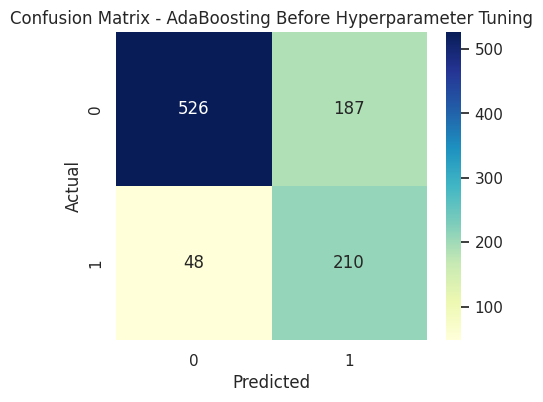

In [39]:
# Classification Report
print("Adb Non tuned Test Classification Report:")
print(classification_report(y_test, y_test_pred_adb))

# Metric Score

accuracy  = accuracy_score(y_test, y_test_pred_adb)
precision = precision_score(y_test, y_test_pred_adb)
recall    = recall_score(y_test, y_test_pred_adb)
f1        = f1_score(y_test, y_test_pred_adb)
f2        = fbeta_score(y_test, y_test_pred_adb, beta=1.5)
auc_adb = roc_auc_score(y_test, adb_pipeline.predict_proba(X_test)[:,1])

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"F2 Score : {f2:.4f}")
print("AUC ROC:", auc_adb)

# Confusion Matrix|
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_test_pred_adb), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - AdaBoosting Before Hyperparameter Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### ADB After Hyperparameter Tuning

Adb Tuned Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.82       713
           1       0.53      0.82      0.64       258

    accuracy                           0.76       971
   macro avg       0.72      0.78      0.73       971
weighted avg       0.82      0.76      0.77       971

Accuracy : 0.7580
Precision: 0.5287
Recall   : 0.8217
F1 Score : 0.6434
F2 Score : 0.7020
AUC ROC: 0.8440398143014014


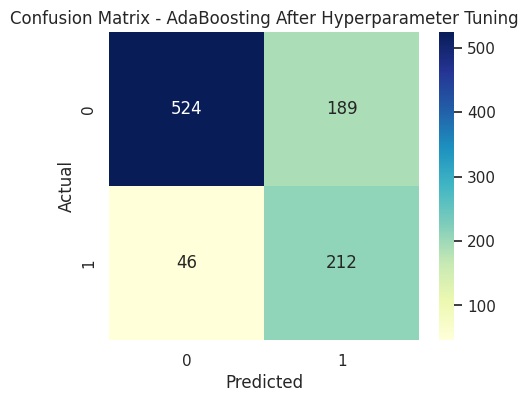

In [40]:
# Classification Report
print("Adb Tuned Test Classification Report:")
print(classification_report(y_test, y_test_pred_tuned_adb))


# Metric Scoere
accuracy_adb_tuned  = accuracy_score(y_test, y_test_pred_tuned_adb)
precision_adb_tuned = precision_score(y_test, y_test_pred_tuned_adb)
recall_adb_tuned = recall_score(y_test, y_test_pred_tuned_adb)
f1_adb_tuned = f1_score(y_test, y_test_pred_tuned_adb)
f2_adb_tuned = fbeta_score(y_test, y_test_pred_tuned_adb, beta=1.5)
auc_adb_tuned = roc_auc_score(y_test, best_adb.predict_proba(X_test)[:,1])

print(f"Accuracy : {accuracy_adb_tuned:.4f}")
print(f"Precision: {precision_adb_tuned:.4f}")
print(f"Recall   : {recall_adb_tuned:.4f}")
print(f"F1 Score : {f1_adb_tuned:.4f}")
print(f"F2 Score : {f2_adb_tuned:.4f}")
print("AUC ROC:", auc_adb_tuned)

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_test_pred_tuned_adb), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - AdaBoosting After Hyperparameter Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


setelah tuning, AdaBoost mengalami kenaikan pada beberapa metrik, terutama recall dan auc. Hal tersebut menunjukkan model menjadi lebih baik dalam mendeteksi Churn dan memiliki kemampuan membedakan kelas positif dan negatif yang baik

#### Logreg Before Hyperparameter Tuning

Logreg Non tuned Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       713
           1       0.52      0.79      0.62       258

    accuracy                           0.75       971
   macro avg       0.71      0.76      0.72       971
weighted avg       0.80      0.75      0.76       971

Accuracy : 0.7467
Precision: 0.5151
Recall   : 0.7946
F1 Score : 0.6250
F2 Score : 0.6809
AUC ROC: 0.8426454439696881


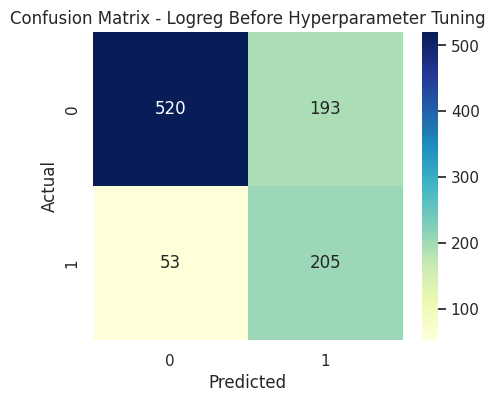

In [42]:
# Classification Report
print("Logreg Non tuned Test Classification Report:")
print(classification_report(y_test, y_test_pred_lg))

# Metric Score
auc_lg = roc_auc_score(y_test, lg_pipeline.predict_proba(X_test)[:,1])
accuracy_lg  = accuracy_score(y_test, y_test_pred_lg)
precision_lg = precision_score(y_test, y_test_pred_lg)
recall_lg = recall_score(y_test, y_test_pred_lg)
f1_lg = f1_score(y_test, y_test_pred_lg)
f2_lg = fbeta_score(y_test, y_test_pred_lg, beta=1.5)

print(f"Accuracy : {accuracy_lg:.4f}")
print(f"Precision: {precision_lg:.4f}")
print(f"Recall   : {recall_lg:.4f}")
print(f"F1 Score : {f1_lg:.4f}")
print(f"F2 Score : {f2_lg:.4f}")
print("AUC ROC:", auc_lg)

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_test_pred_lg), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Logreg Before Hyperparameter Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()


Logreg Tuned Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       713
           1       0.52      0.79      0.62       258

    accuracy                           0.75       971
   macro avg       0.71      0.76      0.72       971
weighted avg       0.80      0.75      0.76       971

Accuracy : 0.7467
Precision: 0.5151
Recall   : 0.7946
F1 Score : 0.6250
F2 Score : 0.6809
AUC ROC: 0.8425802102699588


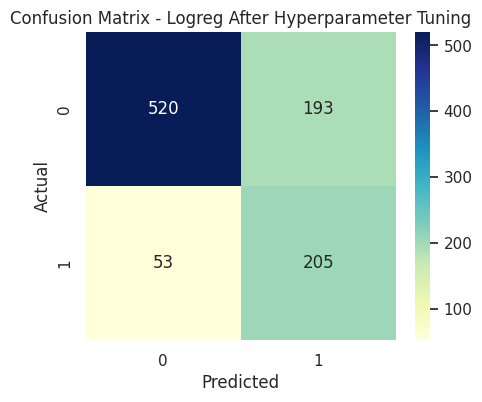

In [43]:
# Classification Report
print("Logreg Tuned Test Classification Report:")
print(classification_report(y_test, y_test_pred_tuned_lg))


# AUC ROC Score
auc_lg_tuned = roc_auc_score(y_test, best_lg.predict_proba(X_test)[:,1])
accuracy_lg_tuned  = accuracy_score(y_test, y_test_pred_tuned_lg)
precision_lg_tuned = precision_score(y_test, y_test_pred_tuned_lg)
recall_lg_tuned = recall_score(y_test, y_test_pred_tuned_lg)
f1_lg_tuned = f1_score(y_test, y_test_pred_tuned_lg)
f2_lg_tuned = fbeta_score(y_test, y_test_pred_tuned_lg, beta=1.5)

print(f"Accuracy : {accuracy_lg_tuned:.4f}")
print(f"Precision: {precision_lg_tuned:.4f}")
print(f"Recall   : {recall_lg_tuned:.4f}")
print(f"F1 Score : {f1_lg_tuned:.4f}")
print(f"F2 Score : {f2_lg_tuned:.4f}")
print("AUC ROC:", auc_lg_tuned)

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_test_pred_tuned_lg), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Logreg After Hyperparameter Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Hasil tuning tidak memberikan perubahan pada skor metrik. Artinya model sudah cukup optimal

#### Gradient Boosting Before Hyperparameter Tuning

GBoost Non tuned Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       713
           1       0.54      0.78      0.64       258

    accuracy                           0.77       971
   macro avg       0.72      0.77      0.73       971
weighted avg       0.81      0.77      0.78       971

Accuracy : 0.7673
Precision: 0.5430
Recall   : 0.7829
F1 Score : 0.6413
F2 Score : 0.6892
AUC ROC: 0.840090457396958


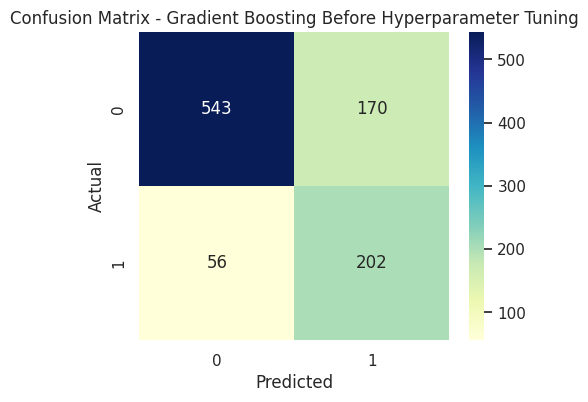

In [44]:
# Classification Report
print("GBoost Non tuned Test Classification Report:")
print(classification_report(y_test, y_test_pred_gb))


# Score
auc_gb = roc_auc_score(y_test, gb_pipeline.predict_proba(X_test)[:,1])
accuracy_gb = accuracy_score(y_test, y_test_pred_gb)
precision_gb = precision_score(y_test, y_test_pred_gb)
recall_gb= recall_score(y_test, y_test_pred_gb)
f1_gb= f1_score(y_test, y_test_pred_gb)
f2_gb= fbeta_score(y_test, y_test_pred_gb, beta=1.5)

print(f"Accuracy : {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall   : {recall_gb:.4f}")
print(f"F1 Score : {f1_gb:.4f}")
print(f"F2 Score : {f2_gb:.4f}")
print("AUC ROC:", auc_gb)

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_test_pred_gb), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Gradient Boosting Before Hyperparameter Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()


#### Gradient Boosting After Hyperparameter Tuning

GBoost Tuned Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       713
           1       0.52      0.83      0.64       258

    accuracy                           0.75       971
   macro avg       0.72      0.78      0.72       971
weighted avg       0.81      0.75      0.76       971

Accuracy : 0.7477
Precision: 0.5156
Recall   : 0.8333
F1 Score : 0.6370
F2 Score : 0.7005
AUC ROC: 0.839068462767866


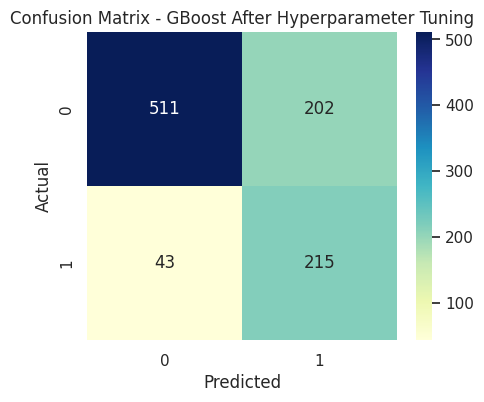

In [45]:
# Classification Report
print("GBoost Tuned Test Classification Report:")
print(classification_report(y_test, y_test_pred_tuned_gb))


# Metric Score
auc_gb_tuned = roc_auc_score(y_test, best_gb.predict_proba(X_test)[:,1])
accuracy_gb_tuned  = accuracy_score(y_test, y_test_pred_tuned_gb)
precision_gb_tuned = precision_score(y_test, y_test_pred_tuned_gb)
recall_gb_tuned = recall_score(y_test, y_test_pred_tuned_gb)
f1_gb_tuned = f1_score(y_test, y_test_pred_tuned_gb)
f2_gb_tuned = fbeta_score(y_test, y_test_pred_tuned_gb, beta=1.5)

print(f"Accuracy : {accuracy_gb_tuned:.4f}")
print(f"Precision: {precision_gb_tuned:.4f}")
print(f"Recall   : {recall_gb_tuned:.4f}")
print(f"F1 Score : {f1_gb_tuned:.4f}")
print(f"F2 Score : {f2_gb_tuned:.4f}")
print("AUC ROC:", auc_gb_tuned)

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_test_pred_tuned_gb), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - GBoost After Hyperparameter Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Hasil tuning menunjukkan bahwa akurasi dan presisi sedikit menurun, namun ada peningkatan di recall dan f2 score (trade-off). Hal ini menunjukkan model jadi lebih sensitif mendeteksi Churn

#### Stacking

Karena hasil model sebelumnya masih dirasa dapat ditingkatkan, dilakukan percobaan menggunakan metode stacking dengan menggabungkan model AdaBoost, Logistic Regression, dan Gradient Boosting, masing-masing menggunakan parameter terbaik yang diperoleh dari proses hyperparameter tuning.

=== STACKING MODEL (LogReg + Ada + GB → Meta: LogReg) ===
Accuracy : 0.7590
Precision: 0.5300
Recall   : 0.8217
F1 Score : 0.6444
F2 Score : 0.7027
AUC ROC: 0.8432814725420487

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82       713
           1       0.53      0.82      0.64       258

    accuracy                           0.76       971
   macro avg       0.72      0.78      0.73       971
weighted avg       0.82      0.76      0.77       971



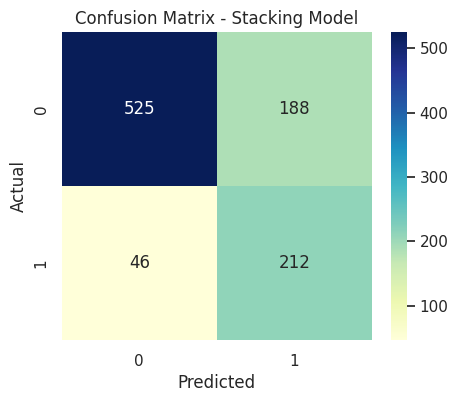

In [47]:
from imblearn.pipeline import Pipeline as ImbPipeline

base_learners = [
    ('adb', AdaBoostClassifier(
        algorithm= 'SAMME',
        estimator= DecisionTreeClassifier(max_depth=3 , class_weight='balanced'),
        learning_rate= 0.1,
        n_estimators=400,
        random_state=42
    )),
    ('lg', LogisticRegression(
        C = 0.5,
        max_iter = 1000,
        penalty = 'l1',
        solver = 'saga',
        random_state=42
    )),
    ('gb', GradientBoostingClassifier(
        learning_rate= 0.01 ,
        max_depth= 2,
        max_features='sqrt',
        min_samples_split=3,
        n_estimators=200,
        random_state=42
    ))
]

# === 2. Meta Learner ===
meta_model = lg

# === 5. Stacking Classifier ===
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=skfold,
    n_jobs=-1
)

# === 6. Pipeline gabung dengan preprocessing ===
stack_pipeline = ImbPipeline([
    ('preprocessing', preprocessor),
    ('balancing', smote),
    ('model', stack_model)
])

# === 7. Fit model ===
stack_pipeline.fit(X_train, y_train)

# === 8. Predict ===
y_train_stack = stack_pipeline.predict(X_train)
y_test_stack = stack_pipeline.predict(X_test)
y_test_proba = stack_pipeline.predict_proba(X_test)[:, 1]

# === 9. Evaluasi ===
auc_stack = roc_auc_score(y_test, stack_pipeline.predict_proba(X_test)[:,1])
accuracy_stack  = accuracy_score(y_test, y_test_stack)
precision_stack = precision_score(y_test, y_test_stack)
recall_stack = recall_score(y_test, y_test_stack)
f1_stack = f1_score(y_test, y_test_stack)
f2_stack = fbeta_score(y_test, y_test_stack, beta=1.5)



cm  = confusion_matrix(y_test, y_test_stack)

print("=== STACKING MODEL (LogReg + Ada + GB → Meta: LogReg) ===")
print(f"Accuracy : {accuracy_stack:.4f}")
print(f"Precision: {precision_stack:.4f}")
print(f"Recall   : {recall_stack:.4f}")
print(f"F1 Score : {f1_stack:.4f}")
print(f"F2 Score : {f2_stack:.4f}")
print("AUC ROC:", auc_stack)


print("\nClassification Report:\n", classification_report(y_test, y_test_stack))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_test_stack), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Stacking Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



### Final Model

In [49]:
summary = pd.DataFrame({
    "Model": ["AdaBoost (Tuned)", "Logistic Regression (Tuned)", "Gradient Boosting (Tuned)", "Stacking"],
    "Accuracy":  [accuracy_adb_tuned, accuracy_lg_tuned, accuracy_gb_tuned, accuracy_stack],
    "Precision": [precision_adb_tuned, precision_lg_tuned, precision_gb_tuned, precision_stack],
    "Recall": [recall_adb_tuned, recall_lg_tuned, recall_gb_tuned, recall_stack],
    "F1 Score": [f1_adb_tuned, f1_lg_tuned, f1_gb_tuned, f1_stack],
    "F2 Score": [f2_adb_tuned, f2_lg_tuned, f2_gb_tuned, f2_stack],
    "ROC AUC": [auc_adb_tuned, auc_lg_tuned, auc_gb_tuned, auc_stack]
})

summary = summary.set_index("Model")
summary

,Accuracy,Precision,Recall,F1 Score,F2 Score,ROC AUC
Model,,,,,,
AdaBoost (Tuned),0.757981,0.528678,0.821705,0.643399,0.701987,0.844040
Logistic Regression (Tuned),0.746653,0.515075,0.794574,0.625000,0.680889,0.842580
Gradient Boosting (Tuned),0.747683,0.515588,0.833333,0.637037,0.700501,0.839068
Stacking,0.759011,0.530000,0.821705,0.644377,0.702703,0.843281


Berdasarkan hasil perbandingan performa model, **AdaBoost (Tuned)** terpilih sebagai model terbaik. Hal ini karena secara keseluruhan model ini menunjukkan **konsistensi skor yang baik pada seluruh metrik evaluasi**, dengan nilai **F2-Score (0.7019), Recall (0.8217) dan ROC AUC (0.8440) yang tinggi**.
Kedua metrik tersebut menjadi fokus utama karena menunjukkan kemampuan model dalam mengidentifikasi kelas positif secara akurat serta kemampuan diskriminatif yang kuat dalam membedakan antara kelas positif dan negatif.

In [50]:
final_model = Pipeline([
    ('preprocessing', preprocessor),
    ('balancing', smote),
    ('model', AdaBoostClassifier(
        algorithm='SAMME',
        estimator=DecisionTreeClassifier(
            class_weight='balanced',
            max_depth=3
        ),
        learning_rate=0.1,
        n_estimators=400,
        random_state=42))
])


final_model.fit(X_train, y_train)

y_pred_final = final_model.predict(X_test)
print(classification_report(y_test, y_pred_final))


              precision    recall  f1-score   support

           0       0.92      0.73      0.82       713
           1       0.53      0.82      0.64       258

    accuracy                           0.76       971
   macro avg       0.72      0.78      0.73       971
weighted avg       0.82      0.76      0.77       971



Classification report tersebut menunjukkan bahwa dengan model AdaBoost yang telah di tuning,

*   Perusahaan telco dapat mendeteksi sebagian besar pelanggan yang akan churn (recall = 82%). Dengan begitu, perusahaan bisa menargetkan program retensi kepada mayoritas pelanggan yang berpotensi churn, sehingga perusahaan dapat mengurangi kemungkinan kehilangan pelanggan dan mencegah revenue loss.
*   Hampir setengah pelanggan diprediksi churn sebenarnya tidak churn (Precision = 53%). Artinya, ada pelanggan loyal yang “tersasar” oleh program retensi. Dengan begitu, biaya program retensi mungkin akan lebih besar dari seharusnya, tapi biasanya tetap lebih kecil dibanding potensi kerugian akibat churn. Selain itu, program retensi ini bisa tetap meningkatkan engagement pelanggan, meski mereka awalnya tidak berisiko churn.

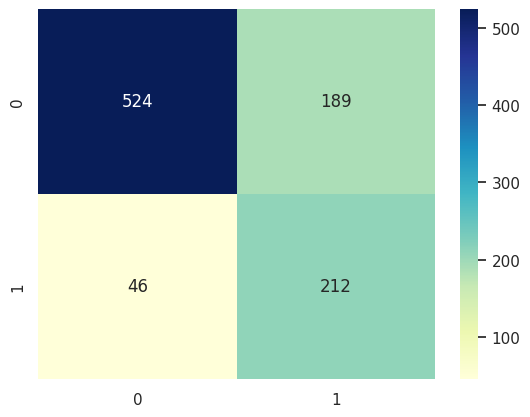

In [51]:
sns.heatmap(confusion_matrix(y_test, y_test_pred_tuned_adb), annot=True, fmt="d", cmap="YlGnBu")
plt.show()

Berdasarkan confusion matrix dari model terbaik (Adaboost), dapat diketahui:

*   **True positive**: Jumlah customer yang aktualnya churn dan diprediksi akan churn sebanyak 212 orang
*   **True Negative**: Jumlah customer yang aktualnya tidak churn dan diprediksi tidak churn sebanyak 524 orang
*   **False Positive**: Jumlah customer yang tidak churn, tetapi diprediksi churn sebanyak 189 orang
*   **False Negative**: Jumlah customer yang churn, namun diprediksi tidak churn sebanyak 46 orang
*   **False Positive Rate**: 26.5%
*   **False Negative Rate**: 17.8%






#### Predict New Data

In [52]:
new_data = pd.DataFrame({
    'Dependents': ['No'],
    'tenure': [7],
    'OnlineSecurity': ['No'],
    'OnlineBackup': ['No'],
    'InternetService': ['DSL'],
    'DeviceProtection': ['No'],
    'TechSupport': ['No'],
    'Contract': ['Month-to-month'],
    'PaperlessBilling': ['Yes'],
    'MonthlyCharges': [10.5]
})

pred = final_model.predict_proba(new_data)
print(pred)

[[0.45894649 0.54105351]]


### Feature Importance

                             Feature  Importance
10            cat__Contract_Two year    0.315532
0                        num__tenure    0.266810
1                num__MonthlyCharges    0.139247
9             cat__Contract_One year    0.089851
3            cat__OnlineSecurity_Yes    0.052250
4              cat__OnlineBackup_Yes    0.033669
5   cat__InternetService_Fiber optic    0.030414
11         cat__PaperlessBilling_Yes    0.029573
6            cat__InternetService_No    0.015583
7          cat__DeviceProtection_Yes    0.009809


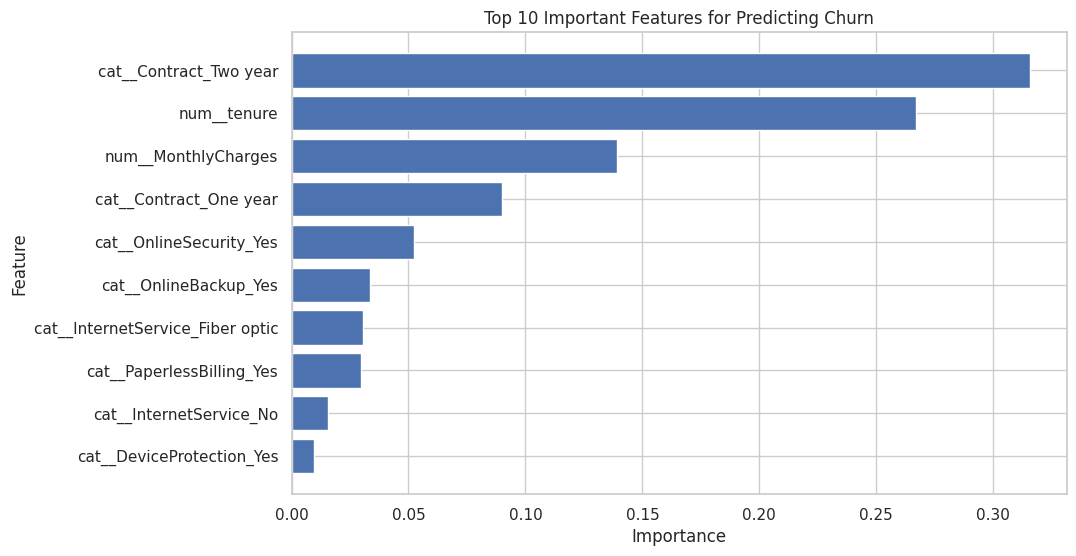

In [53]:
adb_model = final_model.named_steps['model']
importances = adb_model.feature_importances_
feature_names = (
    final_model.named_steps['preprocessing']
    .get_feature_names_out()
)

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Tampilkan 10 fitur teratas
print(feature_importance_df.head(10))

plt.figure(figsize=(10,6))
plt.barh(
    feature_importance_df['Feature'][:10][::-1],
    feature_importance_df['Importance'][:10][::-1]
)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features for Predicting Churn')
plt.show()

Hasil model based feature importance di atas menunjukkan bahwa fitur yang paling berpengaruh terhadap kemungkinan pelanggan churn adalah, tipe kontrak (Contract), lama berlangganan (tenure), pemakaian layanan internet (OnlineSecurity), dan biaya bulanan (MonthlyCharges)

### Save Model

In [54]:
import pickle
filename = "Final Telco Churn Model.sav"

with open(filename, "wb") as file:
    pickle.dump(best_adb, file)
print(f" File successfully saved")

 File successfully saved


### Conclusion



*   Dengan menggunakan model klasifikasi, didapatkan bahwa Adaboost setelah tuning dapat mengurangi 73% pelanggan yang tidak churn untuk tidak diberikan program khusus untuk retensi. Disisi lain, perusahaan dapat mendeteksi sebagian besar pelanggan yang akan churn (recall = 82%). Dengan begitu, perusahaan bisa menargetkan program retensi kepada mayoritas pelanggan yang berpotensi churn, sehingga perusahaan dapat mengurangi kemungkinan kehilangan pelanggan dan mencegah revenue loss.
*   Adapun faktor-faktor yang mempengaruhi churn pada pelanggan antara lain, tipe kontrak langganan yang singkat, durasi berlangganan yang singkat, tidak adanya online security, dan biaya berlangganan yang tinggi

---
**Contoh Perhitungan**

Berikut merupakan contoh perhitungan biaya churn rate (revenue loss) sebelum dan sesudah memakai model ML. Sumber asumsi dasar yang tersedia didapatkan dari https://tridenstechnology.com/telecom-churn/ dan https://customergauge.com/blog/average-churn-rate-by-industry#:~:text=Telecommunications%3A%2031%25&text=Historically%2C%20the%20sector%20has%20benefited,average%20churn%20rate%20of%2031%25.

**Asumsi**:

*   Jumlah pelanggan: 10.000 orang
*   Rata-rata pendapatan per pelanggan (ARPU): 50 USD per bulan
*   Total pendapatan per bulan: 10.000 × 50 USD = 500.000 USD
*   Total pendapatan per tahun: 500.000 USD × 12 = 6.000.000 USD

**Sebelum Menggunakan Model**

*   Rata-rata churn rate perusahaan: 31% per tahun berarti ada sekitar 3.100 pelanggan yang churn
*   Potensi kerugian tahunan (revenue loss): 3.100 × 50 USD × 12 = **1.860.000 USD**

**Setelah Menggunakan ML**

*   Recall: 82%, artinya model mampu mendeteksi 82% pelanggan yang benar-benar churn. Di samping itu, berarti ada 18% pelanggan yang tidak terdeteksi churn (False Negative Rate)
*   Churn Rate Efektif : 18% x 31% = 5.58% dari total pelanggan
*   Pelanggan churn per tahun setelah model = 5.58% × 10.000 ≈ 558 pelanggan
*   Potensi kerugian tahunan (revenue loss): 558 x 50 USD x 12 = **334.800 USD**

Jadi, dengan asumsi semua pelanggan yang terdeteksi model (82%) berhasil retained, perusahaan dapat berpotensi mengurangi revenue loss yang signifikan, dari 1.860.000 USD menjadi 334.800 USD per tahun, dengan penghematan sekitar 1.525.200 USD.









### Recommendation

#### Company/Stakeholder


Perusahaan dapat menerapkan program retensi yang menawarkan insentif khusus bagi pelanggan dengan kontrak dan durasi berlangganan singkat untuk beralih ke paket langganan jangka panjang dengan harga atau manfaat lebih menarik. Program ini dapat berupa diskon biaya berlangganan, penambahan fitur online security gratis untuk periode tertentu, atau bonus layanan tambahan bagi pelanggan yang memperpanjang masa berlangganan.


#### Project/Model



*   Menambahkan data historis serta fitur-fitur baru yang berkaitan dengan perilaku dan karakteristik pelanggan, seperti usia pelanggan, frekuensi penggunaan layanan, jumlah keluhan, atau riwayat pembayaran untuk meningkatkan akurasi model churn.
*   Mencoba teknik resampling lain seperti oversampling, undersampling, atau kombinasi keduanya (SMOTEENN, SMOTETomek, dll) untuk mengatasi ketidakseimbangan data antara pelanggan churn dan non-churn.
*   Mencoba model klasifikasi lain seperti Naive Bayes, Support Vector Machine, dan Kernel SVM



